# Zaawansowane wizualizacje sygnału EKG

## Zaawansowane wizualizacje sygnału EKG

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import neurokit2 as nk
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D


filename = "z4data.pkl"
with open(filename, "rb") as f:
    data = pickle.load(f)


ecg = data['ECG_Clean']
watch = data['Watch_Clean']
ecg_full = data["ECG"]
watch_full = data["Watch"]
FS = data['fs']


print(ecg, len(ecg)) # okna ekg
print(watch, len(watch)) # dane z zegarka
print(FS) #  czestotliwosc probkowania

new_ecg = []
for i in range(len(ecg)):
    new_ecg.append(pd.DataFrame(data=ecg[i], columns = ['I', 'II', 'III', 'avR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']))
ecg = new_ecg # dataframe



[[[ 8.16349012e+00  6.57258773e+00 -1.64109082e+00 ... -1.59284179e-01
    7.98438342e+00  5.73122413e+00]
  [ 6.90041002e+01  7.14308276e+01  1.42262150e+00 ...  1.66664741e+02
    9.09082744e+01  5.33766986e+01]
  [ 8.66463390e+01  7.66520816e+01 -1.12190737e+01 ...  2.00963487e+02
    1.01568735e+02  7.03010615e+01]
  ...
  [-2.69267927e+01 -8.90885790e+01 -6.12055470e+01 ... -4.65280546e+01
   -6.62417097e+01 -5.89823755e+01]
  [-5.46599546e+00 -8.52994538e+01 -7.97615484e+01 ... -3.59774714e+01
   -3.32567093e+01 -1.97756772e+01]
  [ 2.16180577e+01 -7.42100587e+01 -9.66602650e+01 ... -2.73707866e+01
   -2.31902546e+01 -2.59167817e+01]]

 [[-2.76898510e+02  2.03320630e+03  2.31276131e+03 ... -1.88631320e+02
    1.78721300e+02  1.84496018e+02]
  [-3.81787496e+02  1.27618184e+03  1.66226354e+03 ... -9.61754427e+02
   -3.82374726e+02 -1.36190968e+02]
  [-2.98468812e+02  2.39223659e+02  5.41375525e+02 ... -1.12788083e+03
   -6.07731163e+02 -2.83855827e+02]
  ...
  [ 3.19551233e+00 -1.3

### Wizualizacja okien klinicznego EKG

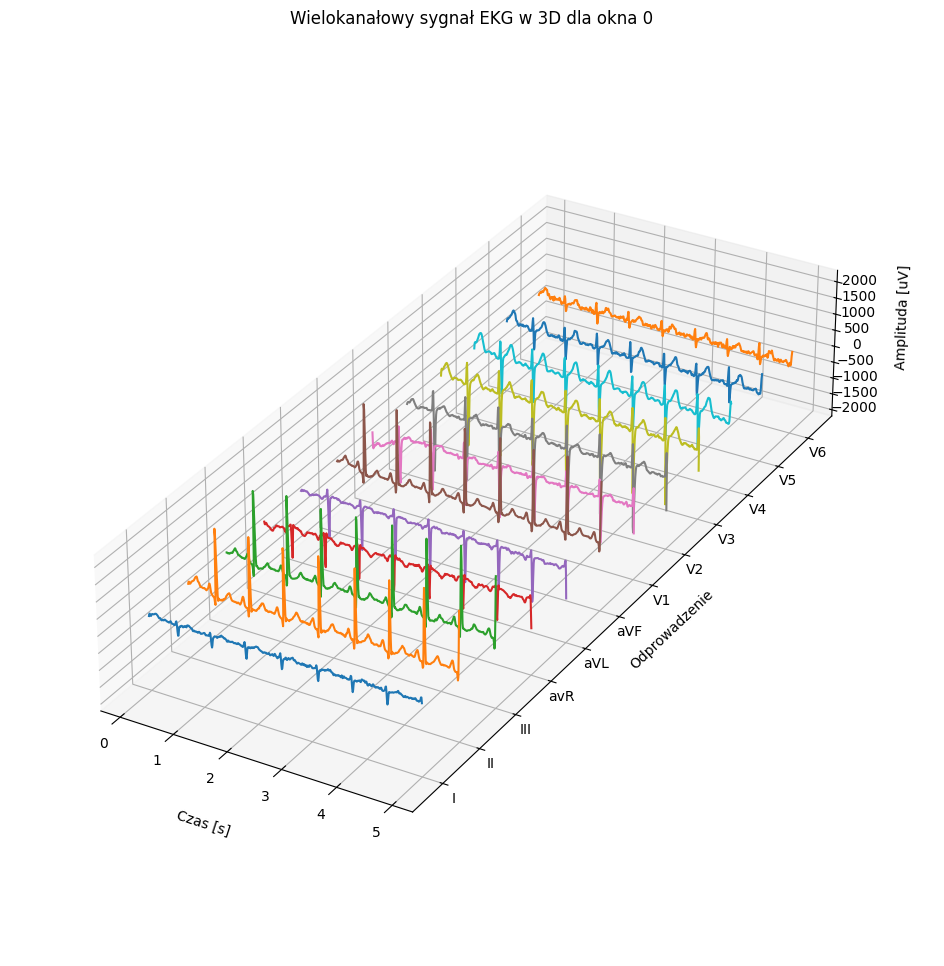

In [3]:
window_num = 0
window = ecg[window_num]
num_samples = 640
num_leads = len(window.columns)
t = np.linspace(0, 5, num_samples)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_leads):
    x = t
    y = np.full_like(t, i)
    z = window.iloc[0:num_samples,i]
    ax.plot(x, y, z, zorder=num_leads - i)


ax.set_xlabel('Czas [s]', labelpad=15)
ax.set_ylabel('Odprowadzenie', labelpad=20)
ax.set_zlabel('Amplituda [uV]', labelpad=15)
ax.set_title(f'Wielokanałowy sygnał EKG w 3D dla okna {window_num}')
ax.set_yticks(range(num_leads))
ax.set_box_aspect((1, 2.5, 0.5))
ax.set_yticklabels([f'{window.columns[i]}' for i in range(num_leads)])

plt.show()

### Wykres fazowy sygnału EKG

Wykres fazowy (phase plot) to graficzna reprezentacja zależności między dwoma różnymi odprowadzeniami sygnału EKG w przestrzeni dwuwymiarowej. Każdy punkt na wykresie odpowiada jednej próbce sygnału, gdzie współrzędna x reprezentuje amplitudę pierwszego odprowadzenia, a współrzędna y amplitudę drugiego odprowadzenia w tym samym momencie czasowym.

Analiza fazowa pozwala na obserwację korelacji przestrzennych między różnymi odprowadzeniami EKG oraz wizualizację dynamiki aktywności elektrycznej serca. Charakterystyczne pętle i trajektorie na wykresie fazowym odpowiadają poszczególnym fazom cyklu serca - załamkom P, QRS i T. Kształt i regularność tych trajektorii mogą dostarczać informacji o synchronizacji aktywności elektrycznej w różnych obszarach serca.

W przedstawionej analizie wykorzystano dwa wybrane odprowadzenia z 10-sekundowego okna sygnału EKG, gdzie punkt początkowy trajektorii zaznaczono na zielono, a punkt końcowy na czerwono, co umożliwia śledzenie ewolucji sygnału w czasie.

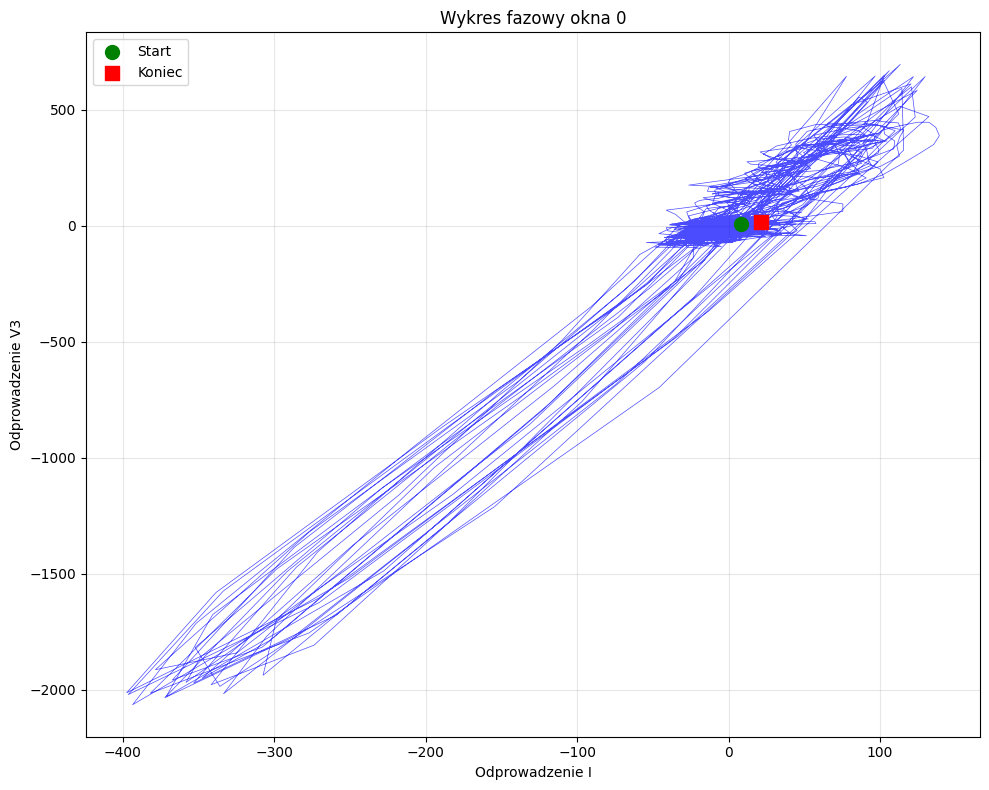

In [4]:
window_idx = 0 
lead_x = 0  
lead_y = 8
cur_window = ecg[window_idx]
signal_x = cur_window.iloc[:,lead_x]
signal_y = cur_window.iloc[:,lead_y]
cols = cur_window.columns
plt.figure(figsize=(10, 8))
plt.plot(signal_x, signal_y, linewidth=0.5, alpha=0.7, color='blue')
plt.scatter(signal_x.iloc[0], signal_y.iloc[0], c='green', s=100, marker='o', label='Start', zorder=5)
plt.scatter(signal_x.iloc[-1], signal_y.iloc[-1], c='red', s=100, marker='s', label='Koniec', zorder=5)

plt.xlabel(f'Odprowadzenie {cols[lead_x]}')
plt.ylabel(f'Odprowadzenie {cols[lead_y]}')
plt.title(f'Wykres fazowy okna {window_idx}')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

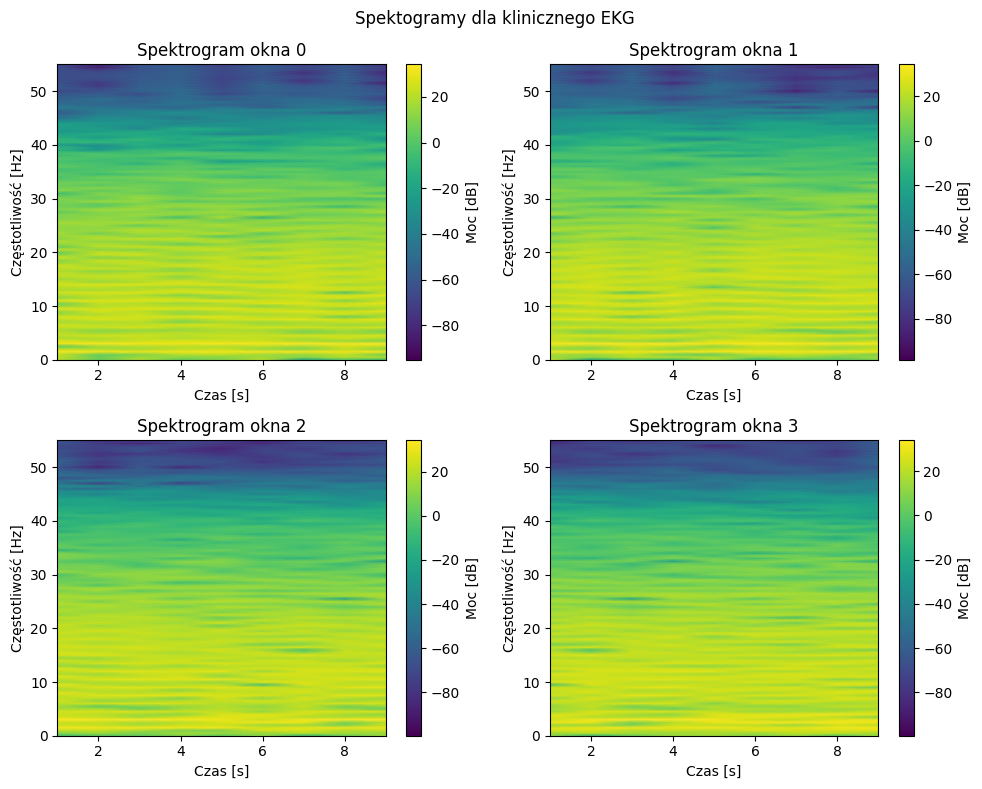

In [54]:
fs = FS
window_duration = 10  
step = 5  
nperseg = 256  
noverlap = 128  
n_windows = ecg[0].shape[0]
n_cols = 2 
n_rows = 2
ecg = data['ECG_Clean']
ecg_2d = ecg[:,:,0:1].squeeze() # shape: (112, 1280)

fig, axes = plt.subplots(2, 2, figsize=(5*n_cols, 4*n_rows))
if n_windows == 1:
    axes = np.array([axes])
axes = axes.flatten()

for i in range(4):
    f, t, Sxx = signal.spectrogram(ecg_2d[i, :], fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    # Wyświetlanie spektrogramu
    im = axes[i].pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
    axes[i].set_ylabel('Częstotliwość [Hz]')
    axes[i].set_xlabel('Czas [s]')
    axes[i].set_title(f'Spektrogram okna {i}')
    axes[i].set_ylim([0, 55])  # Ograniczenie do 50 Hz (typowy zakres dla EKG)
    plt.colorbar(im, ax=axes[i], label='Moc [dB]')

plt.suptitle("Spektogramy dla klinicznego EKG")
plt.tight_layout()
plt.show()

### Wizualizacja okien z zegarka

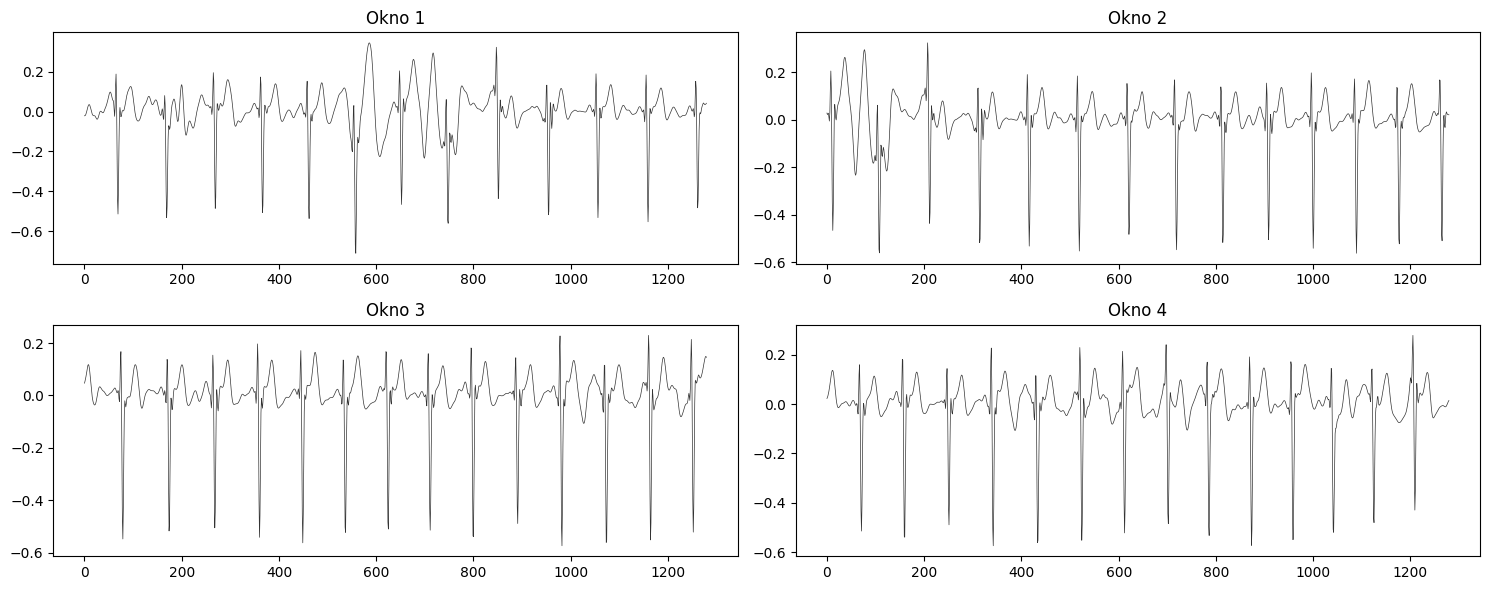

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

for i in range(4):
    ax = axes.flatten()[i]
    ax.plot(watch[i], color='black', alpha=0.8, linewidth=0.5)
    ax.set_title(f"Okno {i + 1}")

plt.tight_layout()
plt.show()

Spektrogram jest graficzną reprezentacją zależności mocy sygnału od czasu i częstotliwości. Umożliwia obserwację, jak składowe częstotliwościowe sygnału EKG zmieniają się w czasie, co jest szczególnie przydatne przy analizie zmienności rytmu serca i wykrywaniu arytmii.

W przypadku sygnału EKG, większość istotnej informacji znajduje się w paśmie częstotliwości 0-50 Hz. Charakterystyczne załamki zespołu QRS są widoczne jako krótkotrwałe wzrosty mocy w wyższych pasmach częstotliwości (10-40 Hz), podczas gdy fala T i fala P mają niższe składowe częstotliwościowe (poniżej 10 Hz).

Do wyznaczenia spektrogramu wykorzystano krótkoterminową transformatę Fouriera (STFT) z oknem o długości 256 próbek i nakładaniem 128 próbek (50%), co zapewnia kompromis między rozdzielczością czasową a częstotliwościową. Analiza przeprowadzona została dla 5 nakładających się 10-sekundowych okien sygnału EKG z zegarka sportowego, przesuwanych co 5 sekund, przy częstotliwości próbkowania 128 Hz.

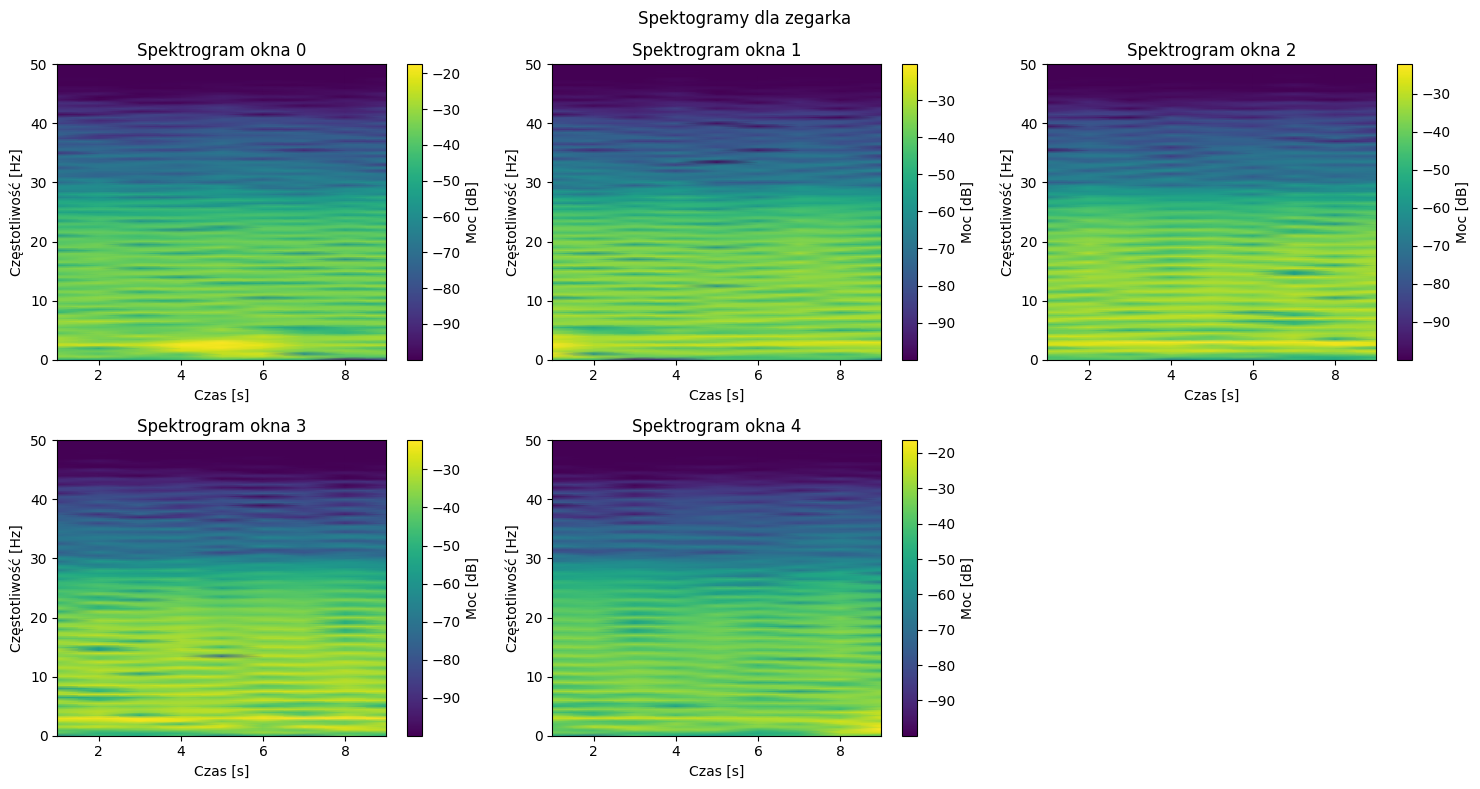

In [55]:
fs = FS
window_duration = 10  
step = 5  
watch_2d = watch.squeeze()  # shape: (5, 1280)
nperseg = 256  
noverlap = 128  

n_windows = watch_2d.shape[0]
n_cols = min(3, n_windows)  
n_rows = int(np.ceil(n_windows / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
if n_windows == 1:
    axes = np.array([axes])
axes = axes.flatten()

for i in range(n_windows):

    f, t, Sxx = signal.spectrogram(watch_2d[i, :], fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    # Wyświetlanie spektrogramu
    im = axes[i].pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='viridis')
    axes[i].set_ylabel('Częstotliwość [Hz]')
    axes[i].set_xlabel('Czas [s]')
    axes[i].set_title(f'Spektrogram okna {i}')
    axes[i].set_ylim([0, 50])  # Ograniczenie do 50 Hz (typowy zakres dla EKG)
    plt.colorbar(im, ax=axes[i], label='Moc [dB]')

# Ukrycie pustych subplotów
for i in range(n_windows, len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Spektogramy dla zegarka")
plt.tight_layout()
plt.show()

### Wykres Poincare'a

Wykres rozrzutu, gdzie każdy punkt reprezentuje parę kolejnych odstępów RR. Oś X to odstęp $RR_n$​ , a oś Y to odstęp $RR_{n+1}$​.

Jest wykorzystywany m.in. do analizy Zmienności Rytmu Serca (HRV), wskaźnika szczególnie cennego dla sportowców w ocenie regeneracji i formy treningowej.

Wykres Poincare'a jest w tym przypadku niemiarodajny, ponieważ okna EKG zawierają za mało zarejestrowanych uderzeń. Potrzebujemy dłuższego zapisu 
sygnału, aby uzyskać wystarczającą ilość punktów do wizualizacji zależności między kolejnymi odstępami RR.

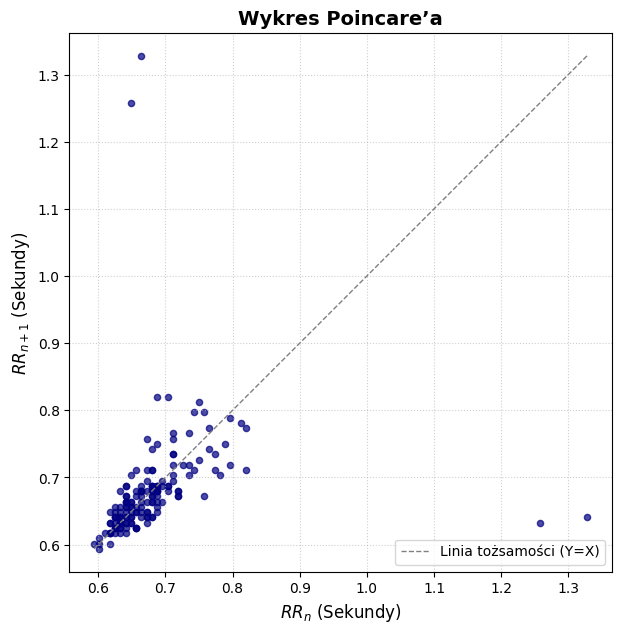

In [56]:
def merge_windows(windows, step_samples):
    merged = windows[0]
    prev = windows[0][step_samples:, :]

    for w in windows[1:]:
        cur_window = w[step_samples:, :]
        if np.array_equal(w[:step_samples, :], prev):
            merged = np.vstack((merged, cur_window))
            prev = cur_window

    return merged

big_ecg = merge_windows(data['ECG_Clean'], 5 * FS)
ecg_diff = big_ecg[:,0]
_, info = nk.ecg_peaks(ecg_diff, sampling_rate=FS)
r_peaks = info["ECG_R_Peaks"]

diff_samples = np.diff(r_peaks)
rr_intervals = diff_samples / FS

rr_n = rr_intervals[:-1]
rr_n_plus_1 = rr_intervals[1:]
max_val = max(rr_intervals)
min_val = min(rr_intervals)

plt.figure(figsize=(7, 7))
plt.scatter(rr_n, rr_n_plus_1, color='navy', alpha=0.7, s=20)
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=1, label='Linia tożsamości (Y=X)')
plt.title('Wykres Poincare’a', fontsize=14, fontweight='bold')
plt.xlabel('$RR_{n}$ (Sekundy)', fontsize=12)
plt.ylabel('$RR_{n+1}$ (Sekundy)', fontsize=12)
plt.axis('equal')
plt.grid(True, linestyle=':', alpha=0.6)
# plt.ylim(0.6, 0.85)
# plt.xlim(0.6, 0.85)
plt.legend()
plt.show()

### Wykres Tachogramu (Tachogram)

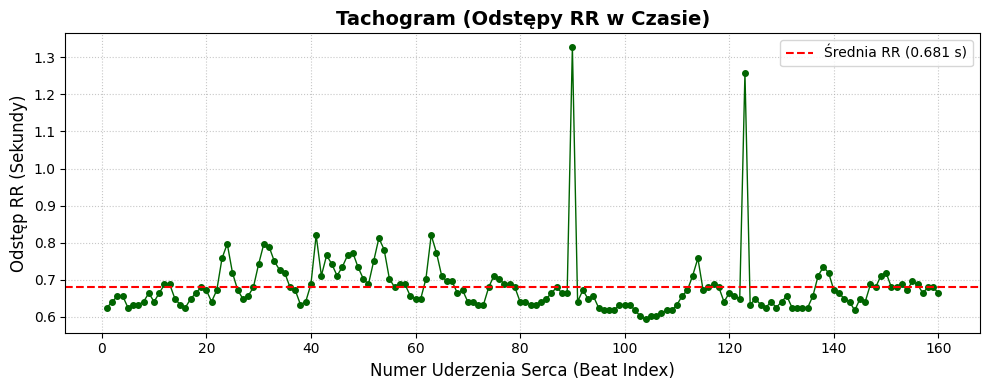

In [ ]:
beat_indices = np.arange(1, len(rr_intervals) + 1)

plt.figure(figsize=(10, 4))
plt.plot(beat_indices, rr_intervals, 
         color='darkgreen', 
         marker='o',         # Dodanie kropek dla każdego uderzenia
         linestyle='-',      # Linia łącząca kropki
         linewidth=1,
         markersize=4)


mean_val = np.mean(rr_intervals) # srednia

plt.axhline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Średnia RR ({mean_val:.3f} s)')
plt.title('Tachogram (Odstępy RR w Czasie)', fontsize=14, fontweight='bold')
plt.xlabel('Numer Uderzenia Serca (Beat Index)', fontsize=12)
plt.ylabel('Odstęp RR (Sekundy)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Zestawienie sygnału klinicznego EKG z zegarkiem na wykresie

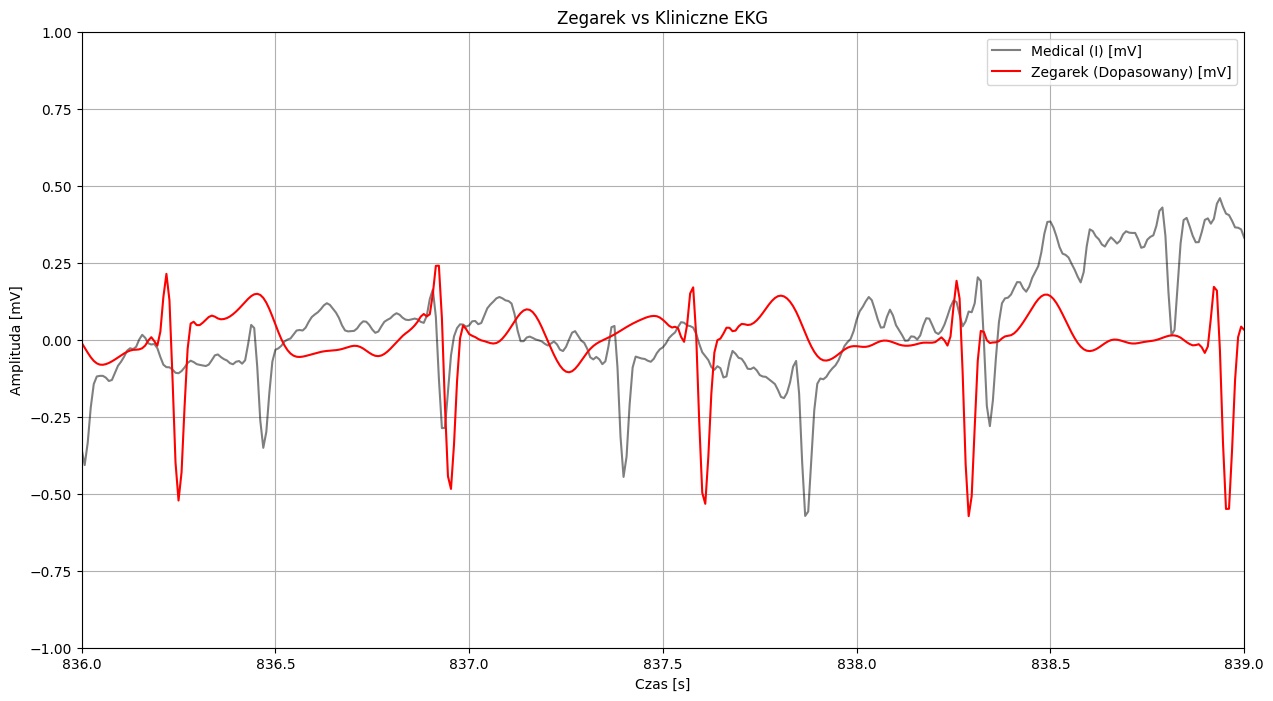

In [9]:
from scipy.signal import correlate

def align_watch_vs_medical(medical_data, watch_data, csv_fs, watch_fs, lead_csv='I', start = 0, end = -1):
    
    if end == -1:
        end = len(medical_data)

    sig_long = medical_data[lead_csv].values.flatten()
    
    sig_short = watch_data["I"].values.flatten()

    #zamiana jednostek
    sig_long = sig_long / 1000

    long_centered = sig_long - np.mean(sig_long)
    short_centered = sig_short - np.mean(sig_short)
    
    corr = correlate(long_centered, short_centered, mode='valid')
    best_idx = np.argmax(corr)

    plt.figure(figsize=(15, 8))
    
    t_long = np.arange(len(sig_long)) / 128
    t_short = (np.arange(len(sig_short)) + best_idx) / 128
    
    plt.plot(t_long, sig_long, color='black', alpha=0.5, label=f'Medical ({lead_csv}) [mV]')
    plt.plot(t_short, sig_short, color='red', linewidth=1.5, label='Zegarek (Dopasowany) [mV]')
    
    plt.xlim((best_idx - 100)/128, (best_idx + len(sig_short) + 100)/128)
    
    plt.title("Zegarek vs Kliniczne EKG")
    plt.xlabel("Czas [s]")
    plt.ylabel("Amplituda [mV]")
    plt.legend()
    plt.grid(True)
    plt.xlim(836, 839)
    plt.ylim(-1 , 1)
    plt.show()



align_watch_vs_medical(ecg_full, watch_full, csv_fs=500, watch_fs=128, lead_csv='I')

## Wizualizacja uśrednionego uderzenia serca

Aby zwizualizować uśrednione uderzenie serca, wymagana jest detekcja R-pików w sygnale EKG za pomocą funkcji biblioteki NeuroKit, która cechuje się bardzo dobrą dokładnością. Ponadto kluczowa jest również delineacja z wykorzystaniem metody peak w NeuroKit, która identyfikuje charakterystyczne punkty (P, Q, S, T) dla każdego R-piku, umożliwiając dokładne określenie początku i końca uderzenia. Segmentacja uderzeń, polegająca na wycięciu jednakowych fragmentów sygnału wokół każdego R-piku, normalizując czasowo uderzenia, umożliwia zestawienie ze sobą wielu uderzeń serca. Uśrednienie wszystkich wysegmentowanych uderzeń serca, punkt po punkcie, prowadzi do uzyskania wizualizacji uśrednionego, reprezentatywnego cyklu pracy serca.

<class 'numpy.ndarray'>
(128,)


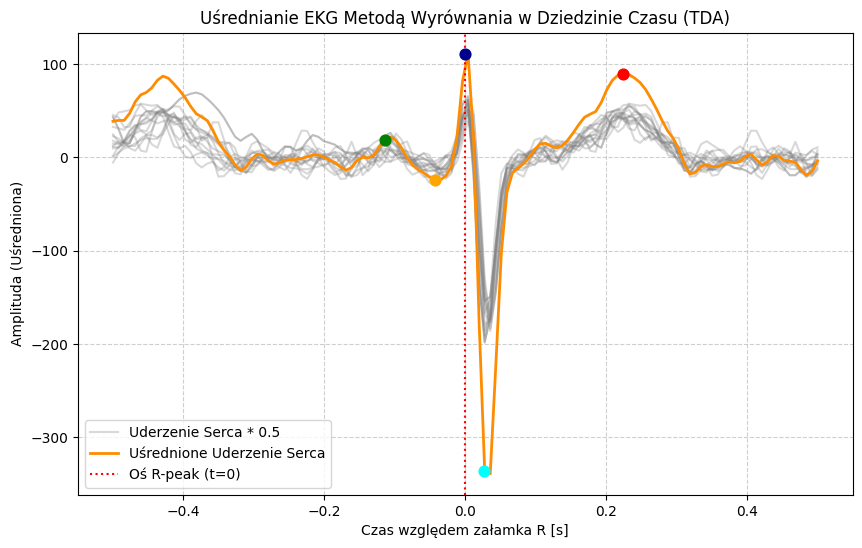

In [10]:
# 1. Ustawienia i Symulacja
sf = 128  # Częstotliwość próbkowania
# ecg = nk.ecg_simulate(duration=15, sampling_rate=sf, heart_rate=70)
ecg = data['ECG_Clean'][0][:,0]

# 2. Wykrywanie R-peaków
_, info = nk.ecg_peaks(ecg, sampling_rate=sf)
r_peaks = info["ECG_R_Peaks"]

# Ustawienie okna czasowego (np. od -0.5s do +0.8s wokół R-peaku)
before_r = int(0.5 * sf)
after_r = int(0.5 * sf)
window_size = before_r + after_r

# Lista do przechowywania wszystkich pojedynczych uderzeń
heartbeats = []

# Iteracja przez każdy wykryty R-peak
for r_peak_index in r_peaks:
    start = r_peak_index - before_r
    end = r_peak_index + after_r

    # Upewnienie się, że okno nie wykracza poza granice sygnału
    if start >= 0 and end <= len(ecg):
        # Wycinamy segment (pojedyncze uderzenie)
        segment = ecg[start:end]
        heartbeats.append(segment)

# Konwersja listy segmentów na macierz NumPy
heartbeats_array = np.array(heartbeats)


# Uśrednienie uderzeń (średnia wzdłuż osi próbek, czyli w pionie)
average_template = np.mean(heartbeats_array, axis=0)
print(type(average_template))
print(average_template.shape)

# dealineacja
delineations, waves = nk.ecg_delineate(
    ecg, 
    r_peaks, 
    sampling_rate=sf, 
    method='peak' 
)

# 4. Wizualizacja
colors = {'P': 'green', 'Q': 'orange', 'S': 'cyan', 'T': 'red'}

# Czas w sekundach dla uśrednionego szablonu
time_points = np.linspace(-0.5, 0.5, len(average_template))

plt.figure(figsize=(10, 6))

# Wyświetlamy kilka pierwszych uderzeń dla kontekstu (opcjonalnie)
plt.plot(time_points, heartbeats_array[0, :] * 0.5, alpha=0.3, color='gray', label="Uderzenie Serca * 0.5")
for i in range(min(20, len(heartbeats_array))):
    plt.plot(time_points, heartbeats_array[i, :] * 0.5, alpha=0.3, color='gray') # *0.5 żeby nie nachodziły na średnią

plt.plot(time_points, average_template, color='darkorange', linewidth=2, label='Uśrednione Uderzenie Serca')
plt.axvline(x=0, color='red', linestyle=':', label='Oś R-peak (t=0)')
plt.title('Uśrednianie EKG Metodą Wyrównania w Dziedzinie Czasu (TDA)')
plt.xlabel('Czas względem załamka R [s]')
plt.ylabel('Amplituda (Uśredniona)')
plt.grid(True, linestyle='--', alpha=0.6)

cur_peak = np.argmax(average_template)
# Rysowanie fal P, Q, S, T
for wave_type in ['P', 'Q', 'S', 'T']:
    peak_key = f"ECG_{wave_type}_Peaks"
    values = np.nonzero(delineations[peak_key])[0]
    diff = abs(r_peaks - values)
    avg_diff = np.mean(diff)

    index = 0 - (avg_diff / FS) if wave_type in ['P', 'Q'] else 0 + (avg_diff / FS)
    val = average_template[round(cur_peak - avg_diff)] if wave_type in ['P', 'Q'] else average_template[round(cur_peak + avg_diff)]
    
    plt.scatter(index, val, color=colors[wave_type], s=60, zorder=5)

plt.scatter(0, average_template[cur_peak], color='darkblue', s=60, zorder=5) # r-pik
plt.legend()
plt.show()

## Analiza pasmowa oraz amplitudowa sygnałów

Aby przeprowadzić analizę pasma i amplitudy sygnałów oraz ich wizualizację, konieczne jest przede wszystkim przeniesienie opisu sygnału z dziedziny czasu do dziedziny częstotliwości. Kluczowym narzędziem do tego celu jest transformata Fouriera, a zwłaszcza jej dyskretna wersja (dla sygnałów cyfrowych) – dyskretna transformata Fouriera (DFT) lub, częściej, wydajna obliczeniowo szybka transformata Fouriera (FFT).

Ważne aby sygnał był spróbkowany z częstotliwością $f_s​$ większą niż podwójna maksymalna częstotliwość składowa sygnału - kryterium Nyquista: 

$f_s\geq2f_{max}$​

Z racji analizy skończonego fragmentu sygnału należy zminimalizować efekt wycieku widmowego (spectral leakage) wynikający z nagłego ucięcia sygnału, stosuje się funkcje okna (np. prostokątne, Hamminga, Hanninga). Pomnożenie sygnału przez funkcję okna sprawia, że jego wartość na brzegach analizowanego bloku dąży do zera.

Analize pasma i amplitudy przeprowadzono osobno dla kazdego odprowadzenia ze względu na rózną morfologię, amplitudę i polaryzację odprowadzeń. Dodatkowo oprowadzenia kończynowe (I, II, III, aVR, aVL, aVF) rejestrują aktywność elektryczną w płaszczyźnie pionowej, a odprowadzenia przedsercowe (V1-V6): rejestrują aktywność elektryczną w płaszczyźnie poziomej.

1280
<class 'pandas.core.frame.DataFrame'>


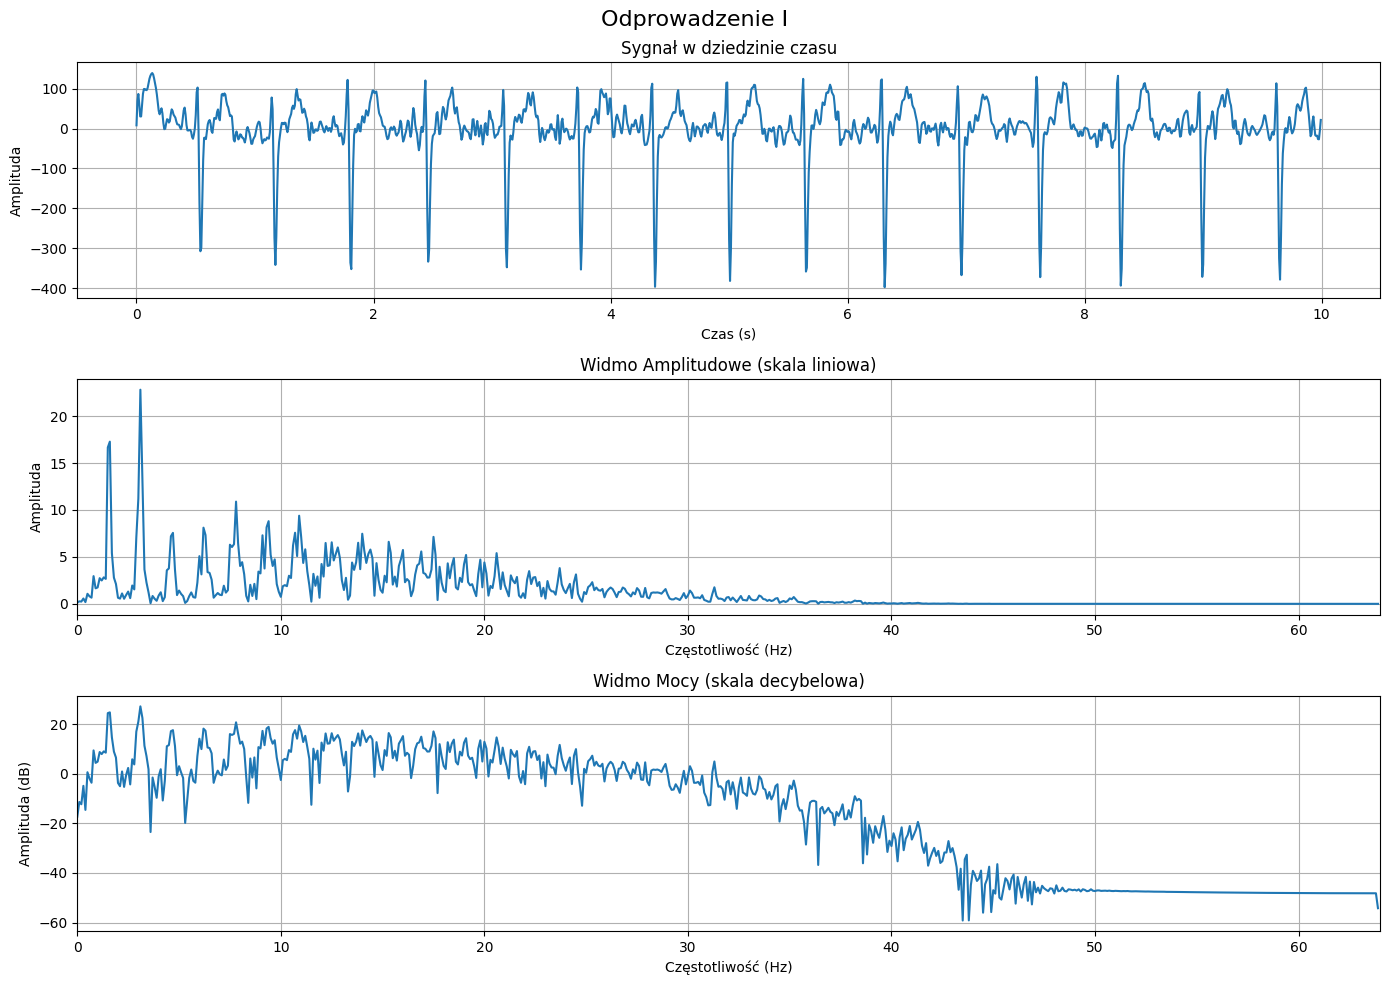

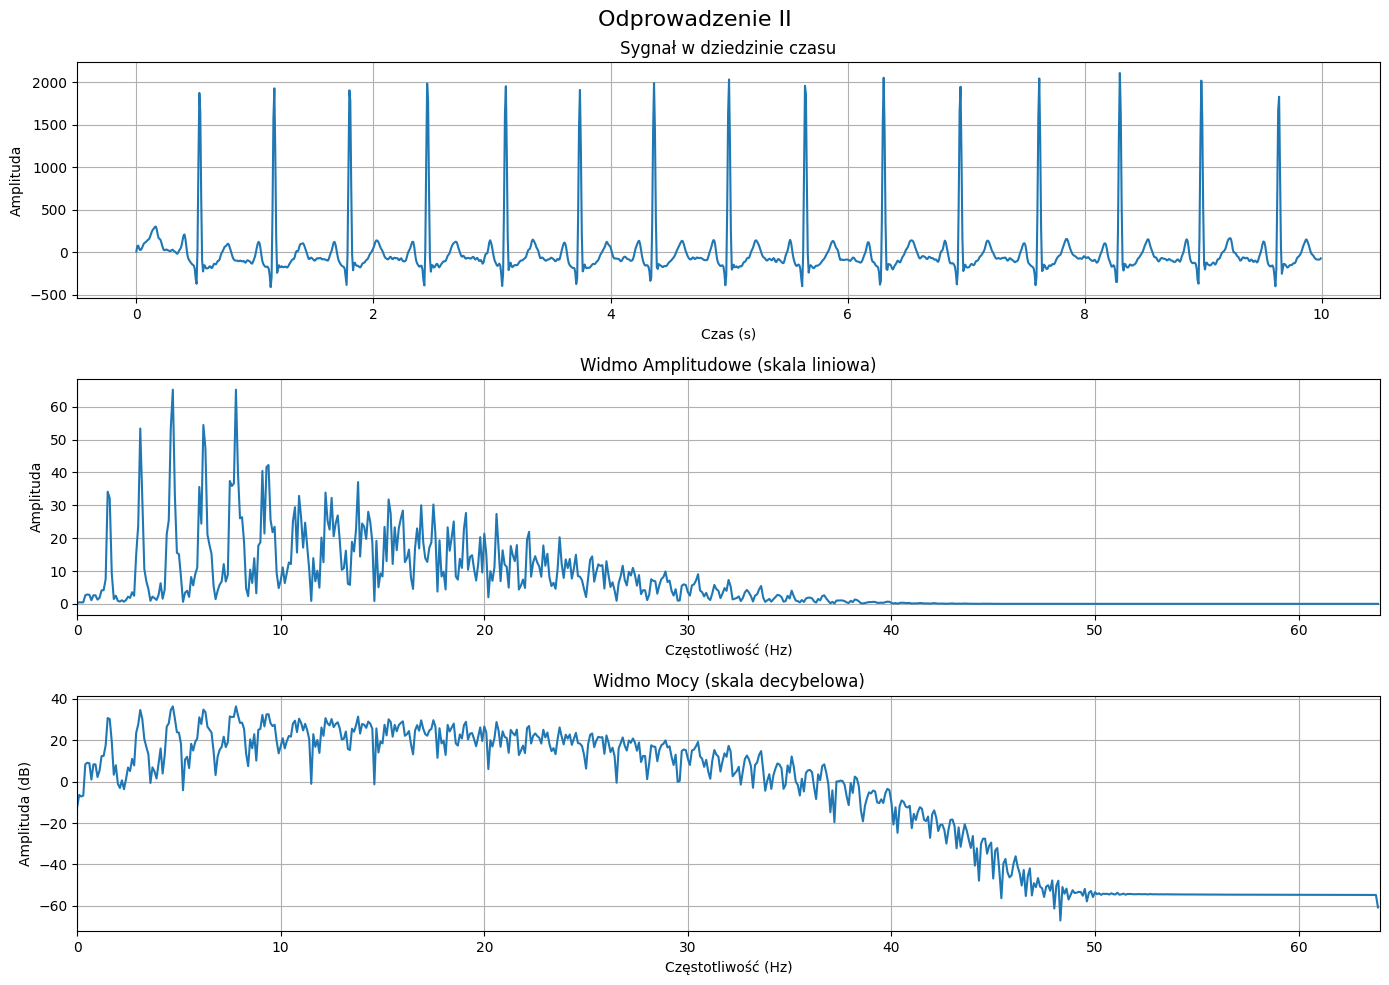

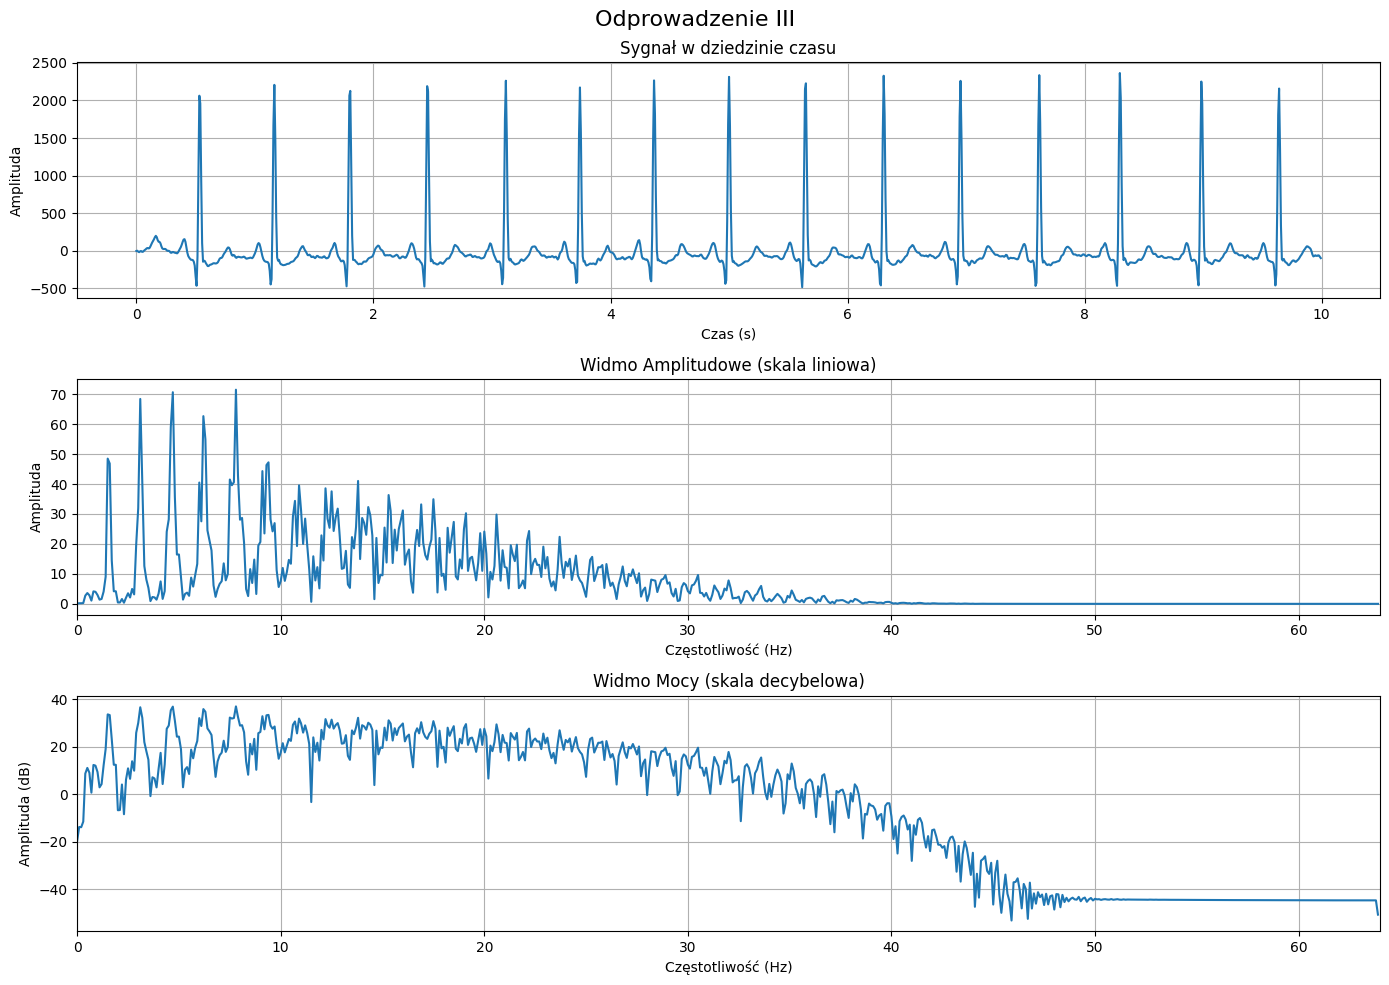

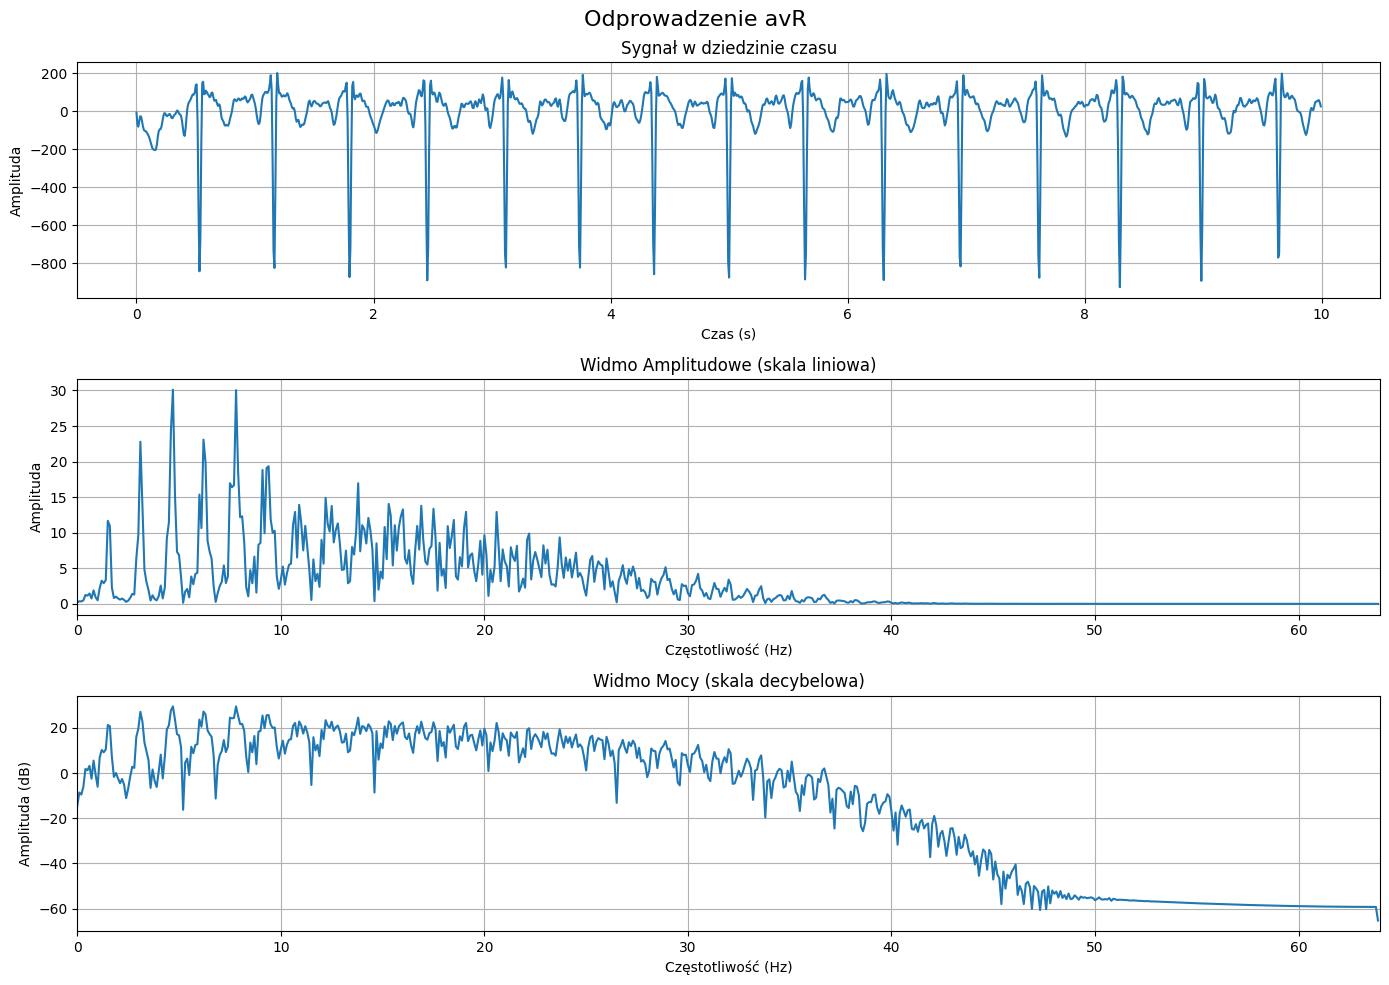

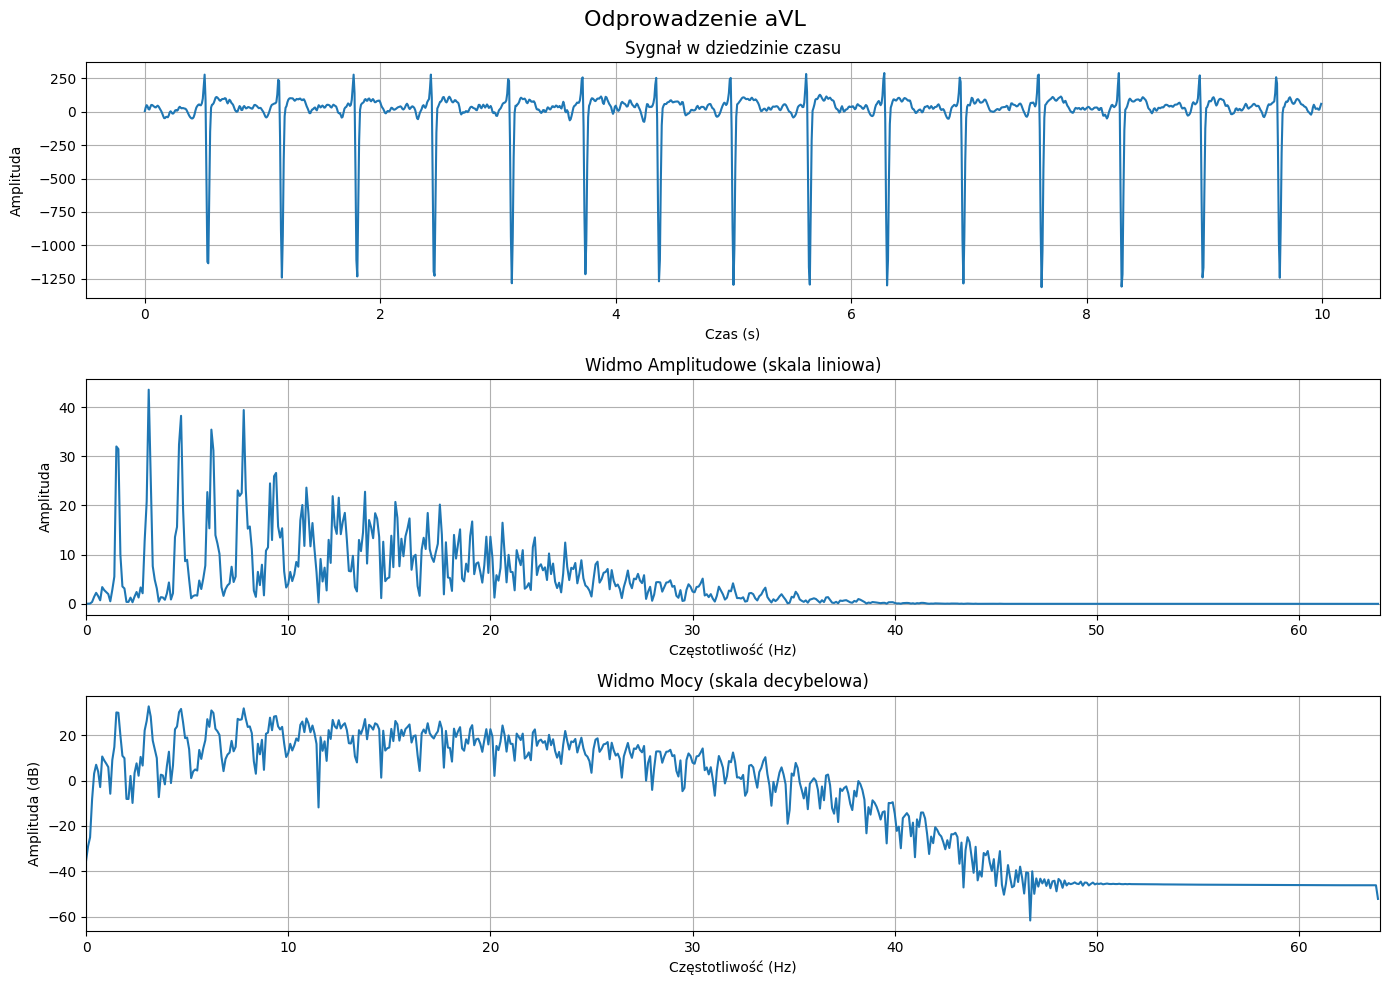

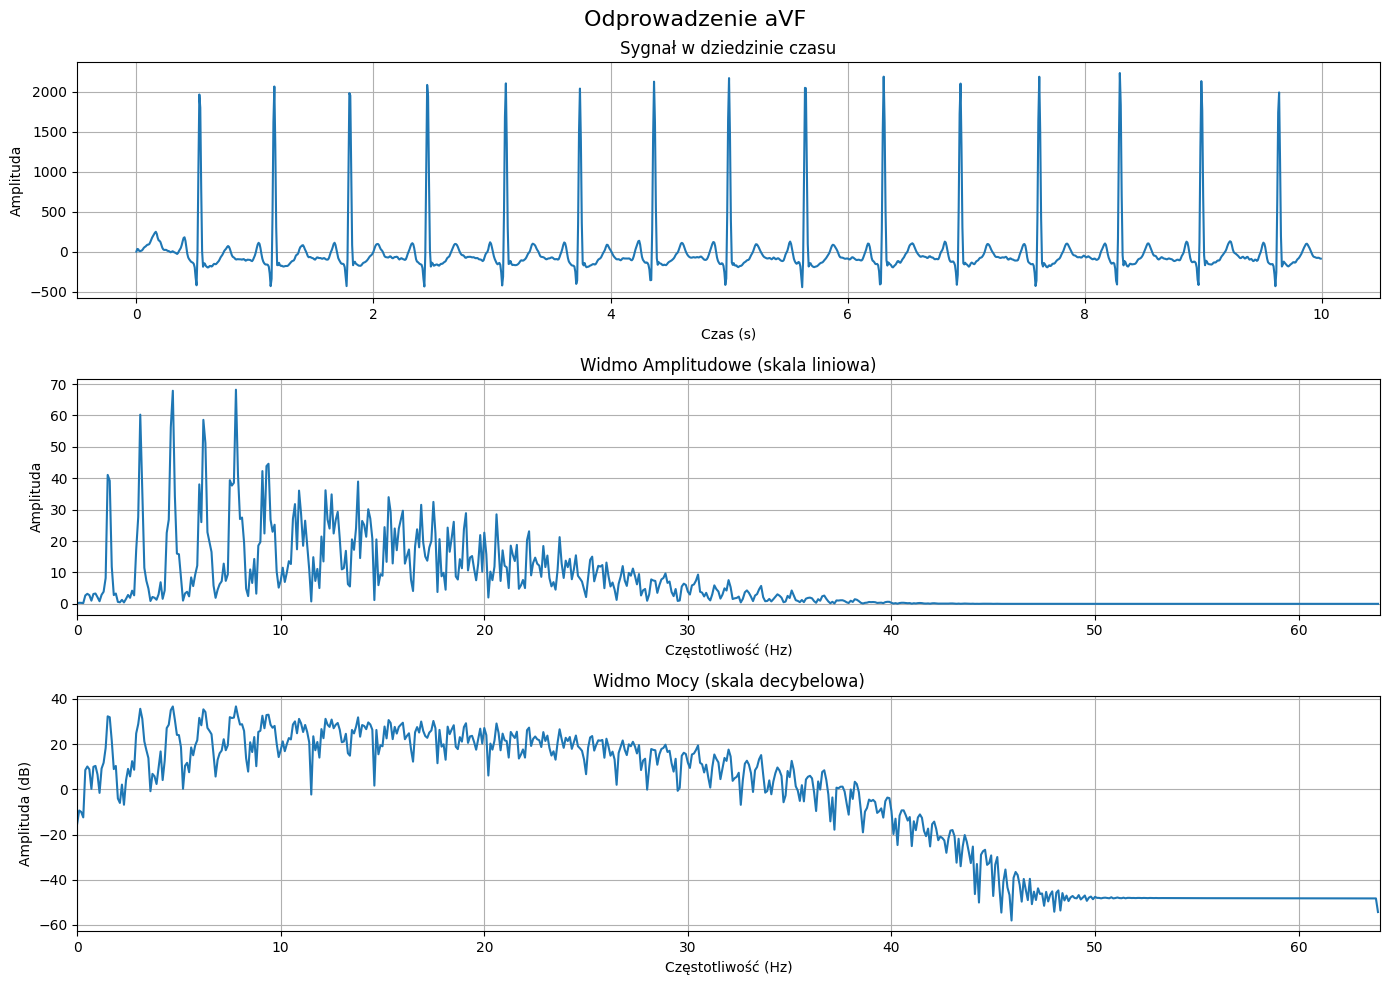

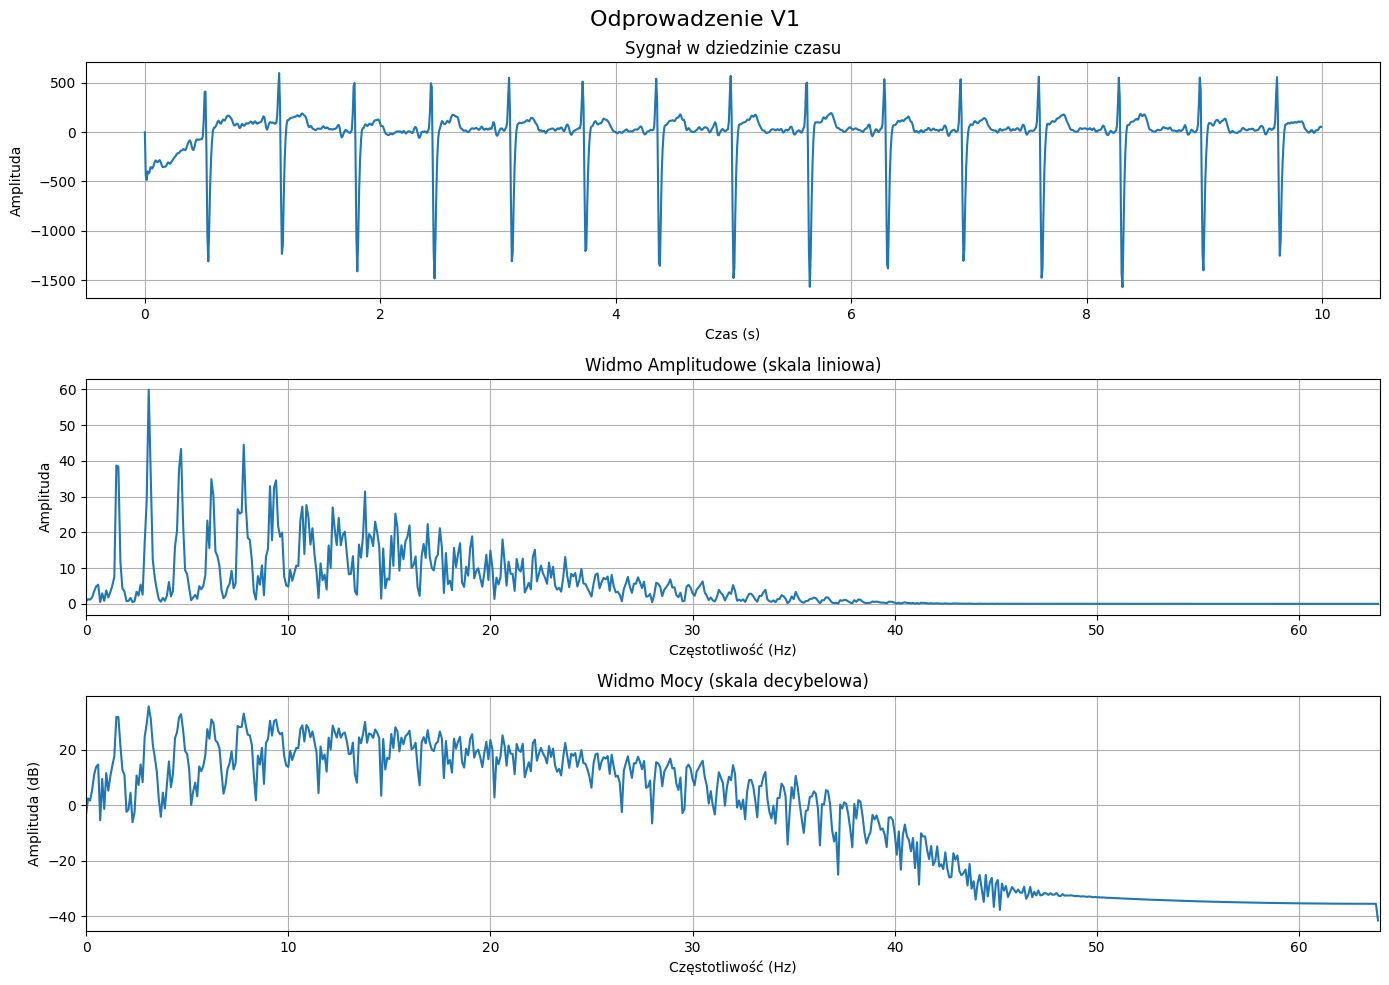

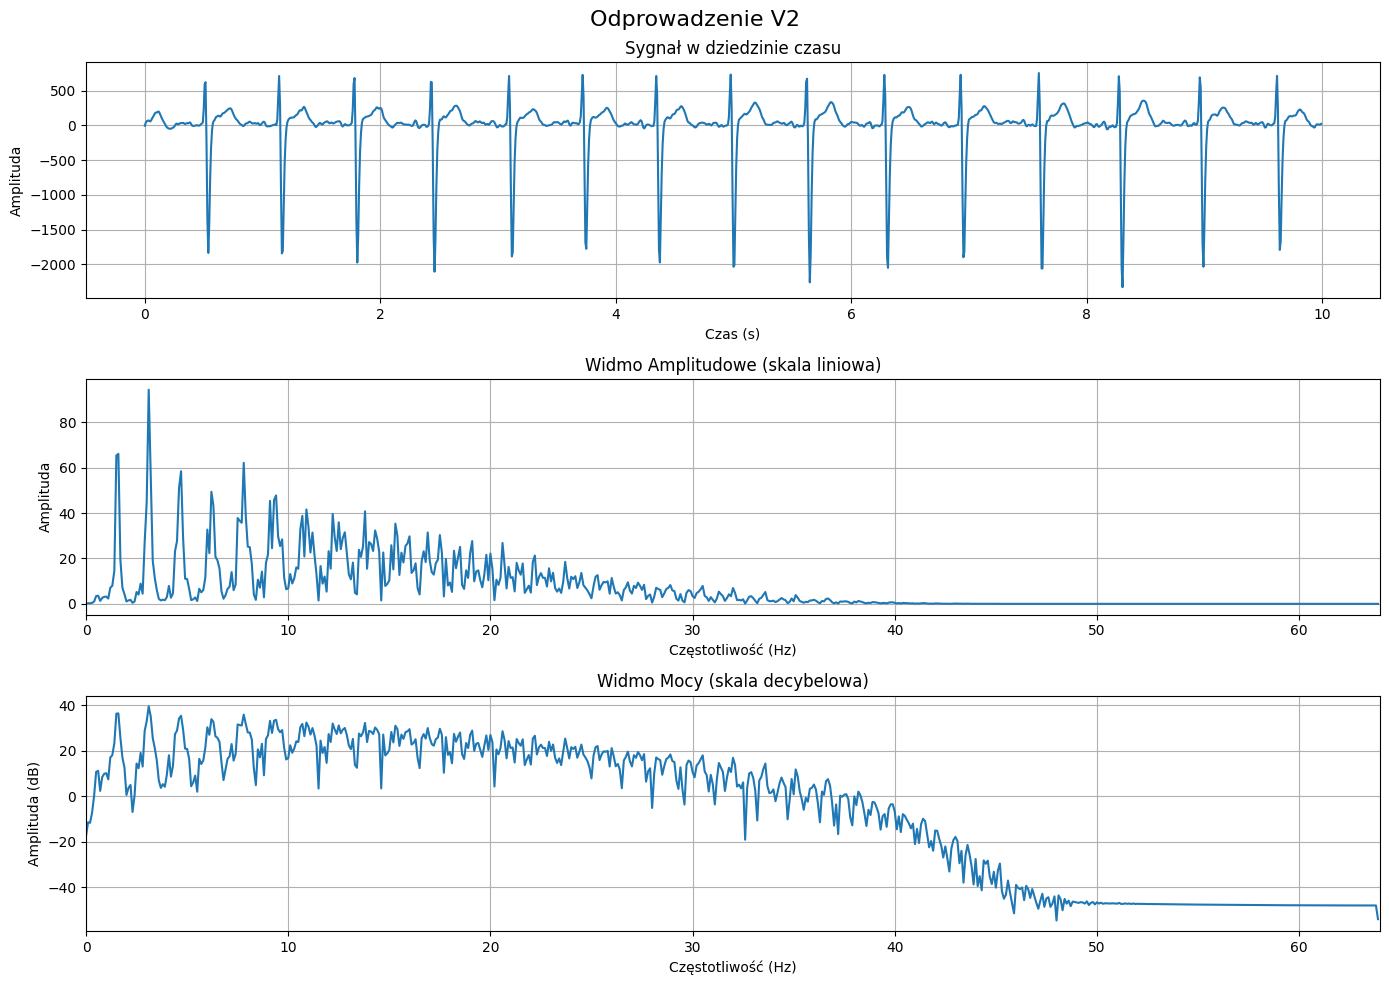

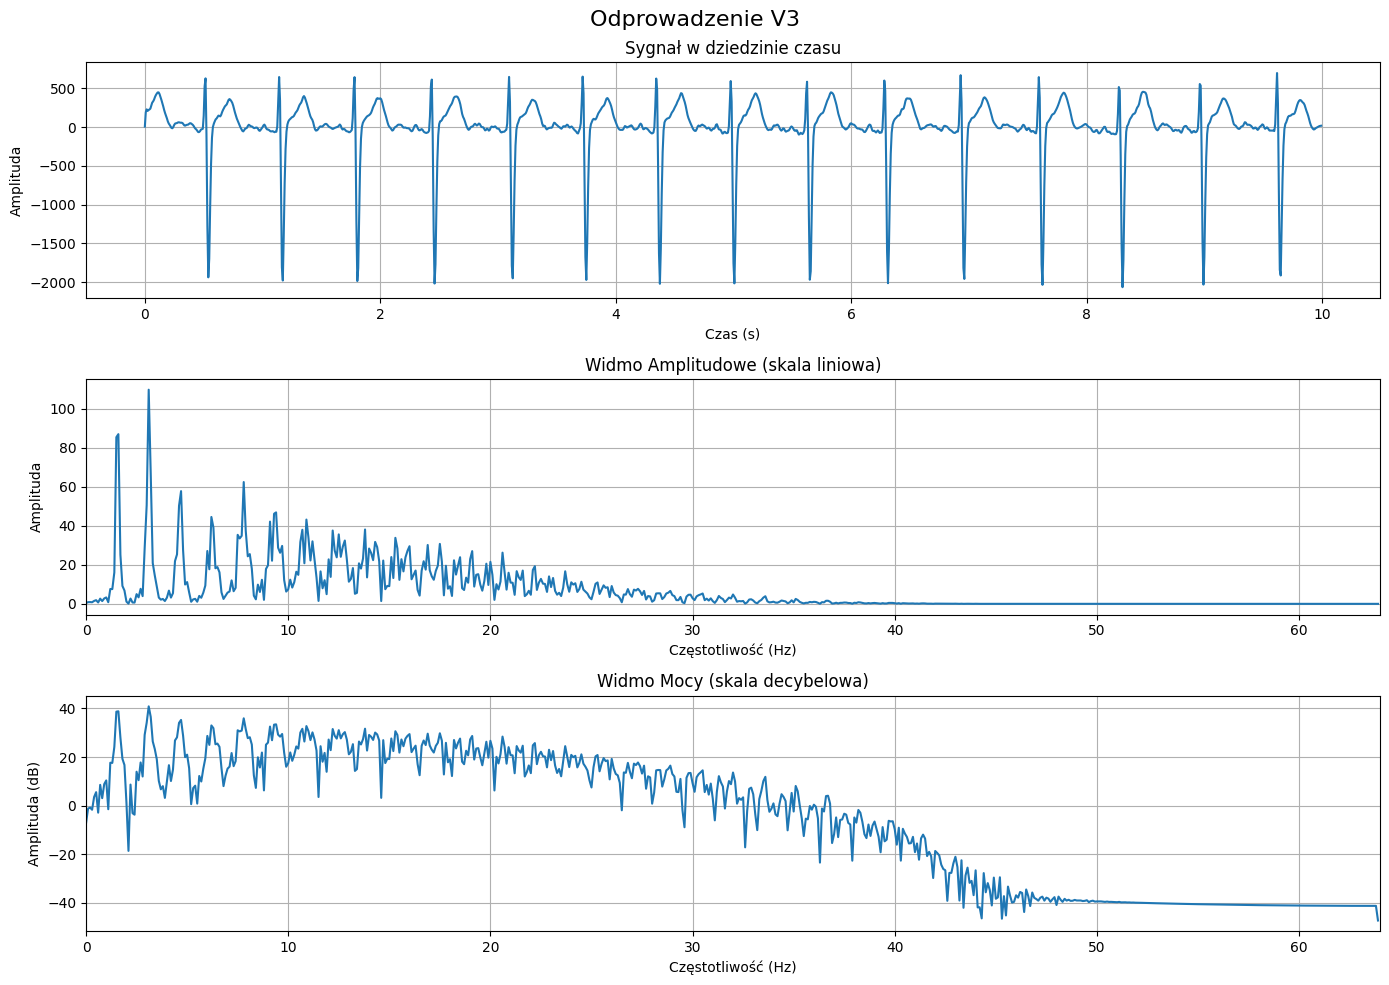

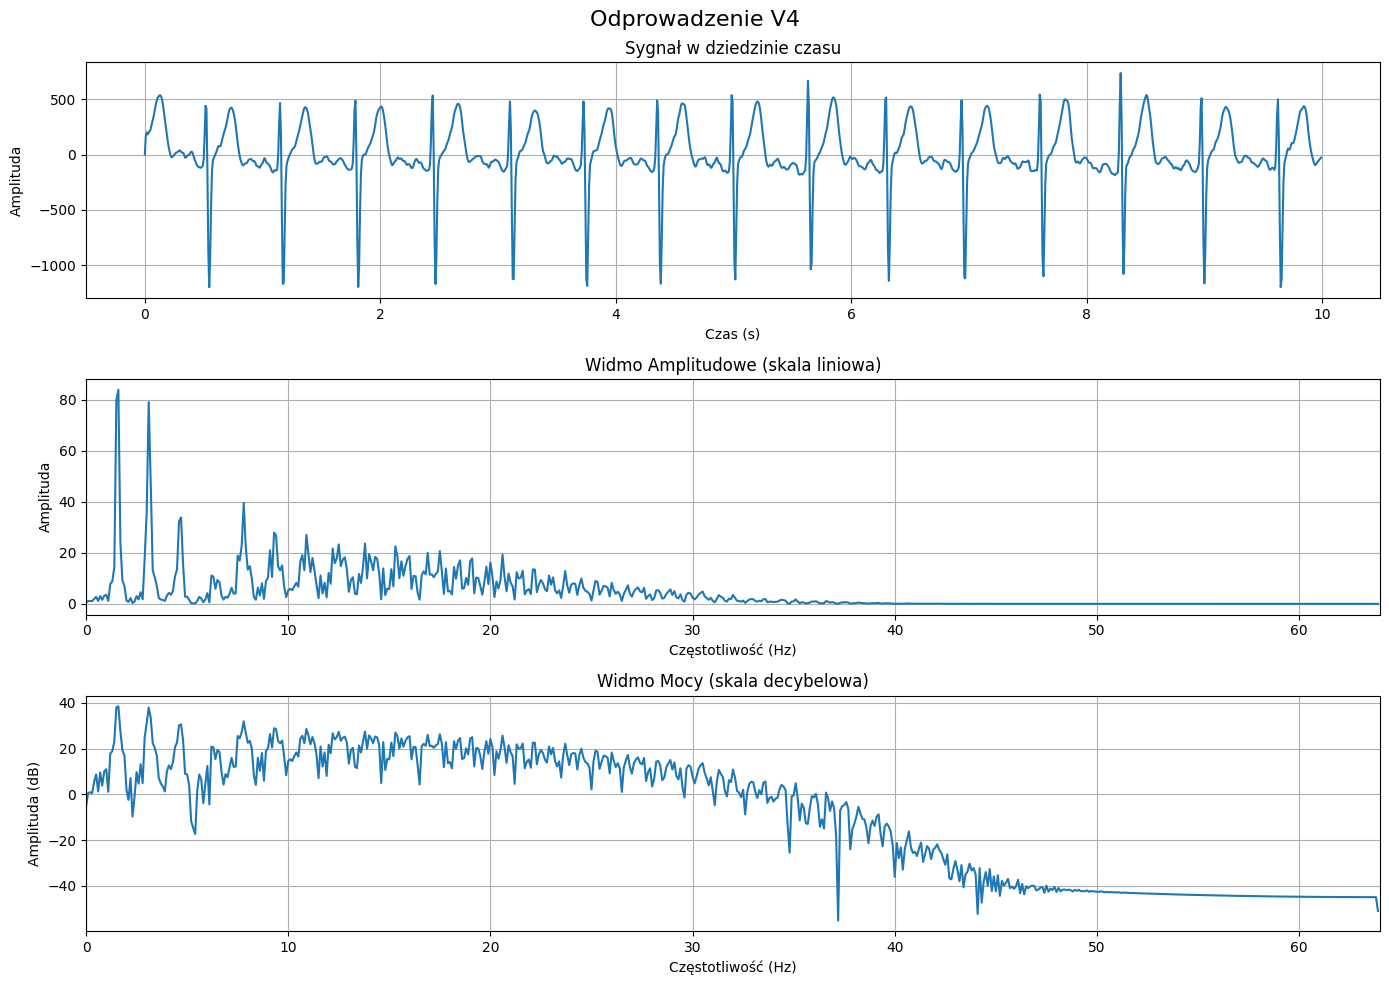

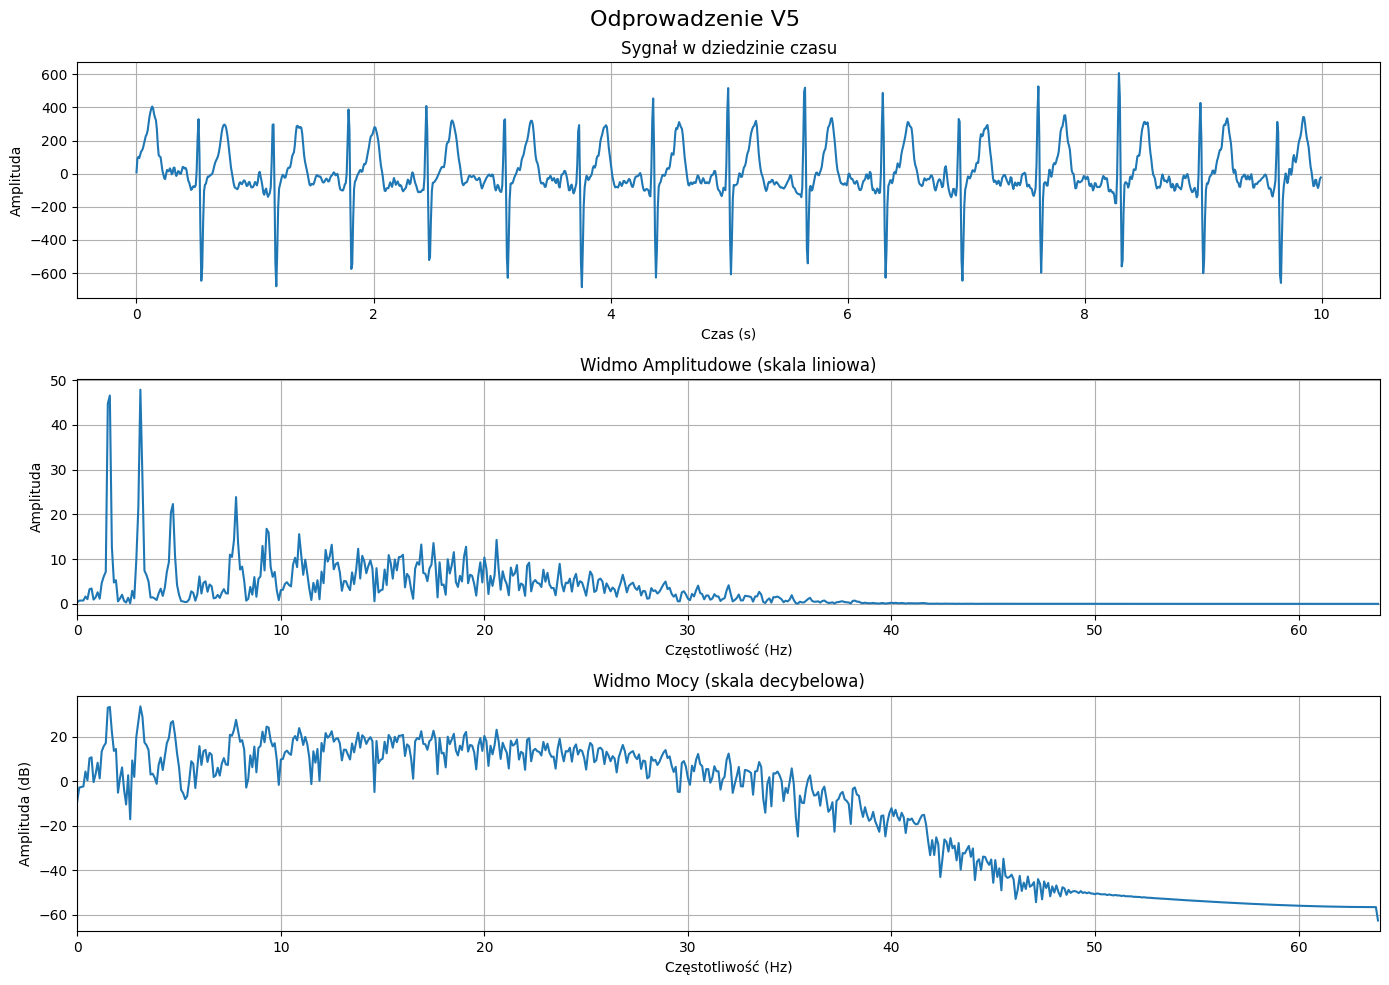

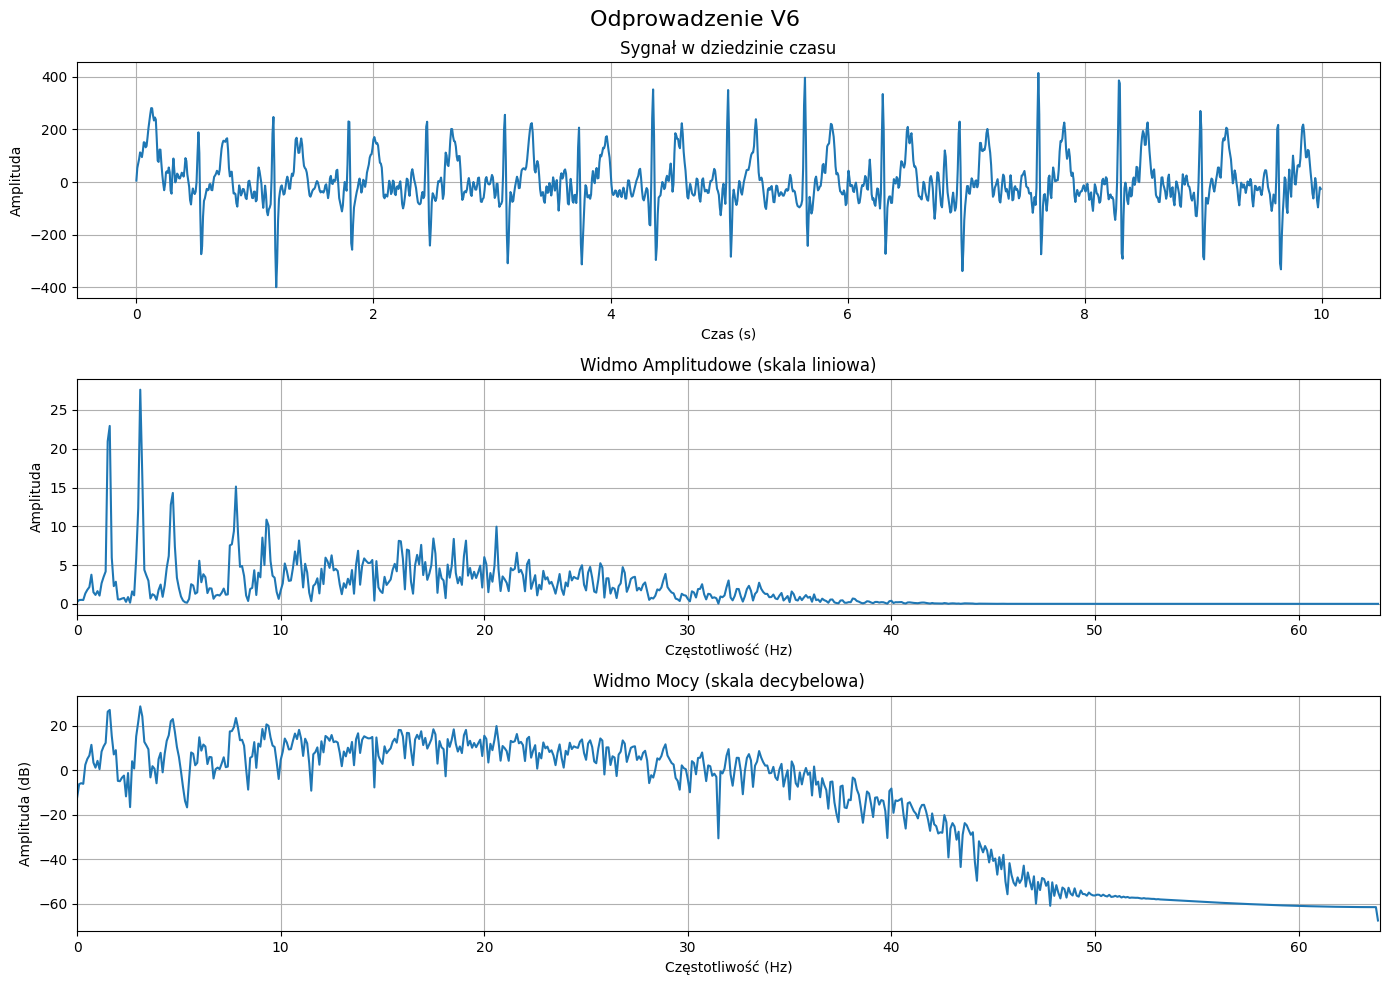

In [57]:
# Parametry sygnału
Fs = FS       # Częstotliwość próbkowania (128 Hz)
T = 1/Fs        # Okres próbkowania
ecg = data['ECG_Clean']
new_ecg = []
for i in range(len(ecg)):
    new_ecg.append(pd.DataFrame(data=ecg[i], columns = ['I', 'II', 'III', 'avR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']))
ecg = new_ecg
print(len(ecg[0]))
L = len(ecg[0])       # Długość sygnału (liczba próbek)
t = np.arange(L) * T # Wektor czasu

print(type(ecg[0]))

# Analiza Pasmo-Amplitudowa (FFT) dla kazdego odprowadzenia
for col in ecg[0].columns:
    signal_time = ecg[0].loc[:, col]

    # Zastosowanie Okna (opcjonalne, ale zalecane)
    # Okno Hamminga minimalizuje wyciek widmowy.
    window = np.hamming(L)
    signal_windowed = signal_time * window

    # Szybka Transformata Fouriera (FFT)
    Y = np.fft.fft(signal_windowed)

    # Obliczenie widma dwustronnego (moduł z wyników FFT)
    P2 = np.abs(Y / L)

    # Przekształcenie widma dwustronnego na jednostronne (dla sygnału rzeczywistego)
    P1 = P2[:L//2] # Bierzemy tylko pierwszą połowę (do częstotliwości Nyquista)
    P1[1:-1] = 2 * P1[1:-1] # Mnożymy przez 2, ponieważ energia jest rozłożona na obie strony

    # Wektor częstotliwości
    f = Fs * np.arange(L//2) / L

    # Wizualizacja Wyników
    plt.figure(figsize=(14, 10))

    # Wykres w Dziedzinie Czasu
    plt.subplot(3, 1, 1)
    plt.suptitle(f"Odprowadzenie {col}", fontsize = 16)
    plt.plot(t, signal_time)
    plt.title('Sygnał w dziedzinie czasu')
    plt.xlabel('Czas (s)')
    plt.ylabel('Amplituda')
    plt.grid(True)

    # Widmo Amplitudowe (skala liniowa)
    plt.subplot(3, 1, 2)
    plt.plot(f, P1)
    plt.title('Widmo Amplitudowe (skala liniowa)')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda')
    plt.xlim([0, Fs/2]) # Ograniczamy do częstotliwości Nyquista
    plt.grid(True)

    # Widmo Mocy (skala dB - decybele)
    plt.subplot(3, 1, 3)
    # Przekształcenie amplitudy na decybele (z małym offsetem, by uniknąć log(0))
    P1_dB = 20 * np.log10(P1 + 1e-10) 
    plt.plot(f, P1_dB)
    plt.title('Widmo Mocy (skala decybelowa)')
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda (dB)')
    plt.xlim([0, Fs/2])
    plt.grid(True)

    plt.tight_layout()
    plt.show()
